This table contains domestic market data reported by both U.S. and foreign air carriers, including carrier, origin, destination, and service class for enplaned passengers, freight and mail when both origin and destination airports are located within the boundaries of the United States and its territories. Foreign carrier data is not available until 3 months after U.S. carrier data is released.

https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FIL&QO_fu146_anzr=Nv4%20Pn44vr45

# Importing libraries and files

In [1]:
import pandas as pd 
import numpy as np 
import calendar
import seaborn as sns 
import matplotlib.pyplot as plt
t_t100D = pd.read_csv("data_covid_airlines.csv")
air_code = pd.read_csv("airport_code.csv")

## Exploring data sets

In [2]:
t_t100D.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,MONTH
0,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,15406,TYE,1
1,0.0,69.0,SNK,Spernak Airways Inc.,13467,MRI,14863,SKW,1
2,0.0,69.0,SNK,Spernak Airways Inc.,13467,MRI,14863,SKW,1
3,0.0,40.0,SNK,Spernak Airways Inc.,16390,BVU,13467,MRI,1
4,0.0,40.0,SNK,Spernak Airways Inc.,13467,MRI,16390,BVU,1


In [3]:
air_code.head()

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


### Checking if existis missing values

In [4]:
t_t100D.isnull().sum()

PASSENGERS             0
DISTANCE               0
UNIQUE_CARRIER         0
UNIQUE_CARRIER_NAME    0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
DEST_AIRPORT_ID        0
DEST                   0
MONTH                  0
dtype: int64

In [5]:
air_code.isnull().sum()

Code           0
Description    0
dtype: int64

- No missing values in both data sets!

### Describing df

In [6]:
t_t100D[["PASSENGERS","DISTANCE"]].describe()

,PASSENGERS,DISTANCE
count,192451.000000,192451.000000
mean,1747.824459,755.494432
std,3996.484228,648.510984
min,0.000000,0.000000
25%,2.000000,262.000000
50%,157.000000,599.000000
75%,1814.000000,1038.000000
max,91173.000000,7247.000000


### Merging Data Sets

In [7]:
v1 = pd.merge(t_t100D,air_code,left_on='ORIGIN_AIRPORT_ID', right_on='Code')
df = pd.merge(v1,air_code,left_on='DEST_AIRPORT_ID', right_on='Code')
df = df.drop(columns=['Code_x', 'Code_y']) # Dropping extra columns 

In [8]:
columns_names = ['PASSENGERS','DISTANCE','UNIQUE_CARRIER','UNIQUE_CARRIER_NAME','ORIGIN_AIRPORT_ID','ORIGIN',
                 'Description_x','DEST_AIRPORT_ID','DEST','Description_y','MONTH']
df = df.reindex(columns=columns_names) # Re arranging columns 
df = df.rename(columns={'Description_x':'ORIGIN_AIRPORT_NAME',"Description_y":"DEST_AIRPORT_NAME"}) # Renaming it 

In [9]:
df.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_AIRPORT_NAME,DEST_AIRPORT_ID,DEST,DEST_AIRPORT_NAME,MONTH
0,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,"Anchorage, AK: Merrill Field",15406,TYE,"Tyonek, AK: Tyonek Airport",1
1,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,"Anchorage, AK: Merrill Field",15406,TYE,"Tyonek, AK: Tyonek Airport",1
2,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,"Anchorage, AK: Merrill Field",15406,TYE,"Tyonek, AK: Tyonek Airport",5
3,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,"Anchorage, AK: Merrill Field",15406,TYE,"Tyonek, AK: Tyonek Airport",10
4,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,"Anchorage, AK: Merrill Field",15406,TYE,"Tyonek, AK: Tyonek Airport",7


### Featuring Engineering 

- Creating new columns (Origin/ Dest City and State) and dropping some extra ones

In [10]:
df[['ORIGIN_CITY_STATE', 'ORIGIN_AIRPORT_NAME']] =df['ORIGIN_AIRPORT_NAME'].str.split(':', expand=True)
df[['ORIGIN_CITY', 'ORIGIN_STATE']] =df['ORIGIN_CITY_STATE'].str.split(',', expand=True)
df[['DEST_CITY_STATE', 'DEST_AIRPORT_NAME']] =df['DEST_AIRPORT_NAME'].str.split(':', expand=True)
df[['DEST_CITY', 'DEST_STATE']] =df['DEST_CITY_STATE'].str.split(',', expand=True)
df = df.drop(columns=['ORIGIN_CITY_STATE', 'DEST_CITY_STATE']) # Dropping extra columns 

- Changing the number of month to their actual name and adding the column "YEAR":

In [11]:
df['MONTH'] = df['MONTH'].apply(lambda x: calendar.month_name[x])
df['YEAR'] = pd.NA
df = df.assign(YEAR='2020')
df.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_AIRPORT_NAME,DEST_AIRPORT_ID,DEST,DEST_AIRPORT_NAME,MONTH,ORIGIN_CITY,ORIGIN_STATE,DEST_CITY,DEST_STATE,YEAR
0,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,Merrill Field,15406,TYE,Tyonek Airport,January,Anchorage,AK,Tyonek,AK,2020
1,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,Merrill Field,15406,TYE,Tyonek Airport,January,Anchorage,AK,Tyonek,AK,2020
2,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,Merrill Field,15406,TYE,Tyonek Airport,May,Anchorage,AK,Tyonek,AK,2020
3,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,Merrill Field,15406,TYE,Tyonek Airport,October,Anchorage,AK,Tyonek,AK,2020
4,0.0,44.0,SNK,Spernak Airways Inc.,13467,MRI,Merrill Field,15406,TYE,Tyonek Airport,July,Anchorage,AK,Tyonek,AK,2020


- Creating new df for **American Airlines**

In [12]:
aa = df[(df.UNIQUE_CARRIER == "AA")]
aa.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_AIRPORT_NAME,DEST_AIRPORT_ID,DEST,DEST_AIRPORT_NAME,MONTH,ORIGIN_CITY,ORIGIN_STATE,DEST_CITY,DEST_STATE,YEAR
2187,484.0,2846.0,AA,American Airlines Inc.,13930,ORD,Chicago O'Hare International,10299,ANC,Ted Stevens Anchorage International,October,Chicago,IL,Anchorage,AK,2020
2192,3530.0,2846.0,AA,American Airlines Inc.,13930,ORD,Chicago O'Hare International,10299,ANC,Ted Stevens Anchorage International,September,Chicago,IL,Anchorage,AK,2020
2193,3959.0,2846.0,AA,American Airlines Inc.,13930,ORD,Chicago O'Hare International,10299,ANC,Ted Stevens Anchorage International,August,Chicago,IL,Anchorage,AK,2020
2194,3994.0,2846.0,AA,American Airlines Inc.,13930,ORD,Chicago O'Hare International,10299,ANC,Ted Stevens Anchorage International,July,Chicago,IL,Anchorage,AK,2020
2442,789.0,3043.0,AA,American Airlines Inc.,11298,DFW,Dallas/Fort Worth International,10299,ANC,Ted Stevens Anchorage International,October,Dallas/Fort Worth,TX,Anchorage,AK,2020


### Ploting 

In [13]:
agg =aa.groupby('MONTH').agg(['mean',max,'min'])
agg

PASSENGERS                   DISTANCE                \
                   mean      max  min         mean     max   min   
MONTH                                                              
April        947.232036   8686.0  1.0  1045.947605  2724.0  83.0   
August      7731.556150  50216.0  1.0  1024.114082  3784.0  90.0   
December    7224.225694  41957.0  0.0  1173.980903  4243.0  83.0   
February   12367.089844  65637.0  1.0  1097.722656  4243.0  24.0   
January    12320.582500  71371.0  0.0  1104.342500  4243.0  67.0   
July        7183.923205  45642.0  1.0  1065.103506  3784.0  90.0   
June        6949.082160  33180.0  1.0  1073.133803  3784.0  66.0   
March       7041.214192  40790.0  0.0  1107.044678  4243.0  83.0   
May         3062.656827  25959.0  0.0  1000.869004  2724.0  83.0   
November    7479.467601  46959.0  0.0  1156.143608  4243.0   0.0   
October     9458.636364  50233.0  6.0  1103.734694  3784.0  83.0   
September   7746.651877  50560.0  0.0  1031.098976  3784.0  83.0   

          ORIGIN_AIRPORT_ID               DEST_AIRPORT_ID                
                       mean    max    min            mean    max    min  
MONTH                                                                    
April          12777.203593  15919  10140    12780.711078  15919  10140  
August         12703.648841  15624  10140    12708.538324  15624  10140  
December       12742.251736  15376  10140    12757.026042  15376  10140  
February       12811.910156  15919  10140    12779.574219  15919  10140  
January        12805.632500  15919  10140    12808.483750  15919  10140  
July           12731.724541  15624  10140    12741.136895  15624  10140  
June           12741.434272  15376  10140    12757.443662  15376  10140  
March          12802.402102  15919  10140    12784.165572  15919  10140  
May            12739.559041  15624  10140    12752.612546  15624  10140  
November       12806.420315  15624  10140    12800.506130  15624  10140  
October        12751.855288  15624  10140    12750.643785  15624  10140  
September      12723.278157  15624  10136    12695.298635  15624  10136

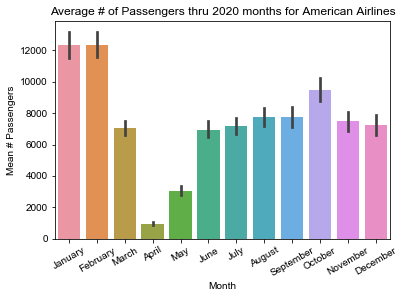

In [14]:
sns.barplot(x='MONTH',
                 y='PASSENGERS',
                 order= ["January","February","March","April","May","June","July","August","September",
                         "October","November","December"],
                 data=aa)
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation=30)
plt.title('Average # of Passengers thru 2020 months for American Airlines')
plt.ylabel('Mean # Passengers')
plt.xlabel('Month')
plt.show()

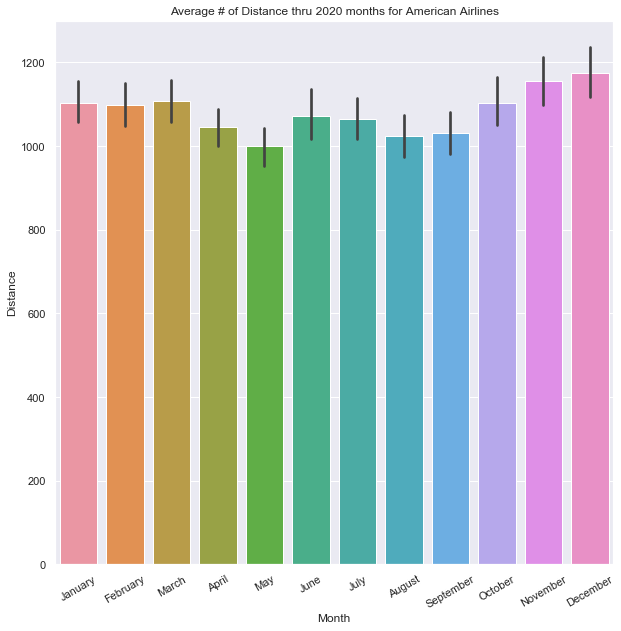

In [15]:
sns.barplot(x='MONTH',
            y='DISTANCE',
            order= ["January","February","March","April","May","June","July","August","September",
                         "October","November","December"],
                 data=aa)
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation=30)
plt.title('Average # of Distance thru 2020 months for American Airlines')
plt.ylabel('Distance')
plt.xlabel('Month')
plt.show()

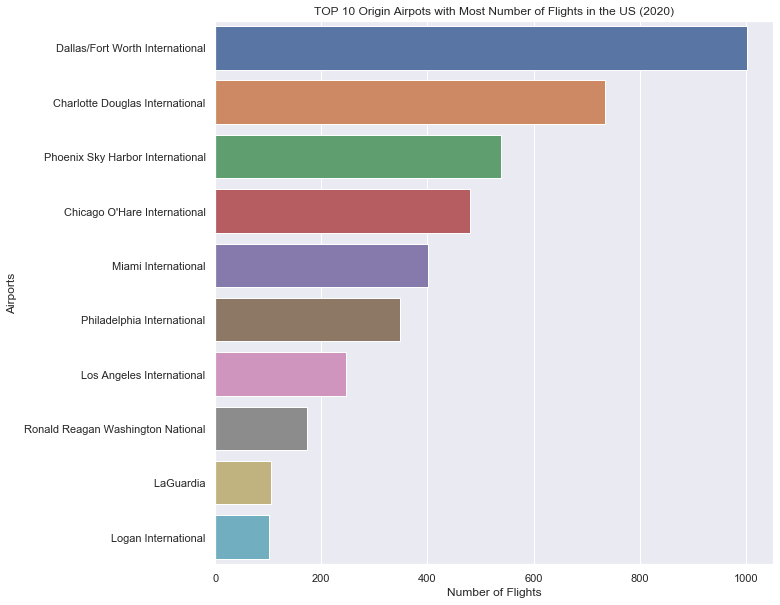

In [16]:
top10_org=pd.DataFrame(aa['ORIGIN_AIRPORT_NAME'].value_counts().iloc[0:10])
top10_org.index.name = 'ORGIN_AIRP'
top10_org.reset_index(level=0, inplace=True)
top10_org.head()
sns.barplot(x='ORIGIN_AIRPORT_NAME',y='ORGIN_AIRP',data=top10_org)
plt.title('TOP 10 Origin Airpots with Most Number of Flights in the US (2020)')
plt.ylabel('Airports')
plt.xlabel('Number of Flights')
plt.show()

C:\Users\Matheus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


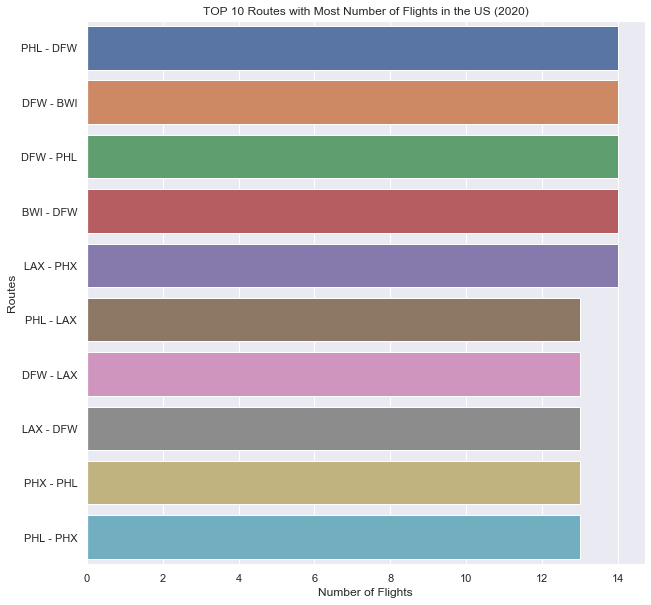

In [17]:
aa["ROUTE"]=aa['ORIGIN']+" - "+aa['DEST']
top10_route=pd.DataFrame(aa['ROUTE'].value_counts().iloc[0:10])
top10_route.index.name = 'ROUTE_NUMBER'
top10_route.reset_index(level=0, inplace=True)
top10_route.head()
sns.barplot(x='ROUTE',y='ROUTE_NUMBER',data=top10_route)
plt.title('TOP 10 Routes with Most Number of Flights in the US (2020)')
plt.ylabel('Routes')
plt.xlabel('Number of Flights')
plt.show()

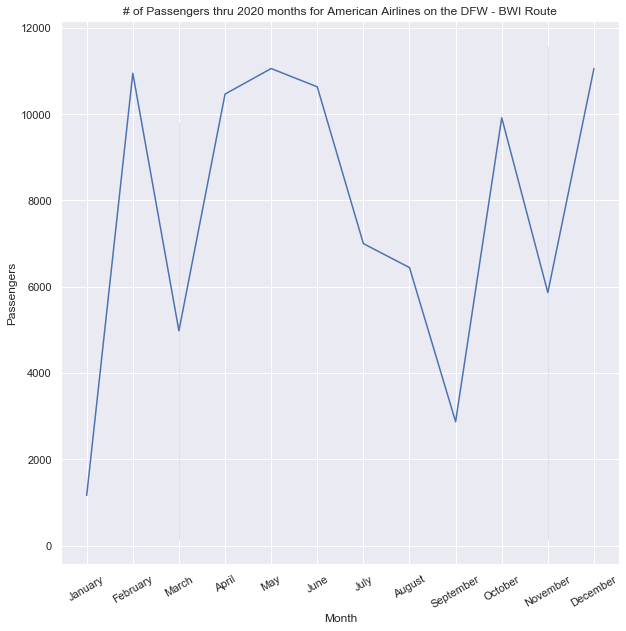

In [20]:
ax1=sns.lineplot(data=aa[(aa.ROUTE == "DFW - BWI")], x="MONTH", y="PASSENGERS");
ax1.set_xticklabels(labels=["January","February","March","April","May","June","July","August","September",
                         "October","November","December"])
plt.xticks(rotation=30)
plt.title('# of Passengers thru 2020 months for American Airlines on the DFW - BWI Route')
plt.ylabel('Passengers')
plt.xlabel('Month')
plt.show()

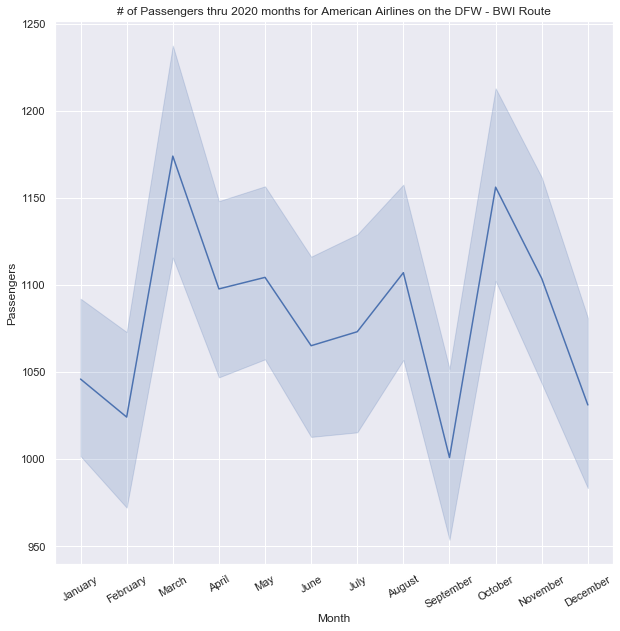

In [19]:
ax11=sns.lineplot(data=aa, x="MONTH", y="DISTANCE");
ax11.set_xticklabels(labels=["January","February","March","April","May","June","July","August","September",
                         "October","November","December"])
plt.xticks(rotation=30)
plt.title('# of Passengers thru 2020 months for American Airlines on the DFW - BWI Route')
plt.ylabel('Passengers')
plt.xlabel('Month')
plt.show()
plt.show()